## Part 2: Structure Learning with ```bnstruct```

In this notebook we **construct Bayesian Network structures** from the **Ruiz** (Ruiz), **Asia**, and **Child** test datasets using the **bnstruct** package in R. We emulate the **K2** algorithm via a **Hill-Climbing** search with a fixed node ordering and a maximum fan-in.

---

### 1. Problem Formalisation

Given a database $D$ of $N$ cases over variables $X = \{X_1,\dots,X_n\}$, we seek a Directed Acyclic Graph (DAG) $\mathcal{G}$ that maximises a score function:
$$
\mathcal{G}^* = \arg\max_{\mathcal{G}\in\mathrm{DAGs}}\mathrm{Score}(\mathcal{G}\mid D).
$$

- **Nodes**: represent random variables.  
- **Edges**: encode conditional dependencies.  
- **Score**: is used to choose the set of parent nodes belonging to each node.

The **K2 algorithm** (Cooper & Herskovits, 1992) is a greedy search that:
1. Requires a **total order** of variables.
2. Iteratively adds parents (from earlier in the order) that improve the score, up to a **max fan-in** (maximum number of parents).

In **bnstruct**, we emulate K2 by calling:
```r
learn.network(..., algo="hc", layering=order, max.fanin=K)

---
### 2. The ´bnstruct´ package
The ´bnstruct´ package is built to generate network structures starting from structured datasets, providing search methods that assign the dataset the network structure that maximizes the scoring function. 
In order to emulate the K2 algorithm, in our implementation we use the Hill-Climbing heuristic search method, and use BDeu scoring function. 

The Hill-Climbing heuristic search method ...

The BDeu scoring function uses the uniform prior ...

In the package one can define ``` BN-class ``` obejcts, which can be used to construct networks from datasets. Datasets need first to be compiled as `BNDataset-class` objects if not already included in the package. The **Asia** and **Child** datasets can indeed be loaded as `BNDataset` objects directly.

The ´learn.network´method learns the structure of a `BN` object given a `BNDataset`. We use the Max-Min Hill-Climbing (`mmhc`) heuristic search method algorithm and the `BDeu` (Bayesian Dirichlet equivalent uniform) scoring function in order to emulate the K2 algorithm implemented in the previous analysis. The ´layering´ parameter can be used to 

In a K2‐style search, for each node $X_i$ one only consider parents among those $X_j$ with index earlier in your layering:
$$
\pi(X_i)\;\subseteq\;\{\,X_j : \text{position}(j)<\text{position}(i)\}\,.
$$
Ordering should place strongly‐dependent variables before their children.

We use 
For discrete variables X and Y, their empirical mutual information is
I(X;Y)\;=\;\sum_{x,y} \hat P(x,y)\,\log\frac{\hat P(x,y)}{\hat P(x)\,\hat P(y)}.
Intuitively, I(X;Y) measures how much knowing X reduces uncertainty about Y.

A simple heuristic ordering is:
	1.	Compute the pairwise MI matrix \bigl[I(X_i;X_j)\bigr]_{i,j}.
	2.	For each variable X_i, set
s_i \;=\;\sum_{j\neq i} I(X_i;X_j)
(“total dependence”).
	3.	Order the variables by descending s_i: the most “informative” variables go first.

In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE)) install.packages("BiocManager")
if (!requireNamespace("BiocManager", quietly = TRUE)) BiocManager::install(c("gRbase", "Rgraphviz", "gRain", "png"), force = TRUE)
if (!requireNamespace("BiocManager", quietly = TRUE)) install.packages("bnstruct")

In [2]:
library(Rgraphviz) 
library(bnstruct)
library(igraph)
library(infotheo)
source("man_functions.R")
source("man_objects.R")

Caricamento del pacchetto richiesto: graph

Caricamento del pacchetto richiesto: BiocGenerics


Caricamento pacchetto: 'BiocGenerics'


I seguenti oggetti sono mascherati da 'package:stats':

    IQR, mad, sd, var, xtabs


I seguenti oggetti sono mascherati da 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, saveRDS, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Caricamento del pacchetto richiesto: grid

Caricamento del pacchetto richiesto: bitops

Caricamento del pacchetto richiesto: igraph


Caricamento pacchetto: 'igraph'


I seguenti oggetti sono mascherati da 'package:graph':

    degree, edges, intersection, union


I seguenti oggetti sono mascherati da 'package:BiocGe

PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...
PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


Rows: 10000 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (8): asia, tub, smoke, lung, bronc, either, xray, dysp

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


Rows: 10000 Columns: 11
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (11): Akt, Erk, Jnk, Mek, P38, PIP2, PIP3, PKA, PKC, Plcg, Raf

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


Rows: 10000 Columns: 20
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (20): BirthAsphyxia, HypDistrib, HypoxiaInO2, CO2, ChestXray, Grunting, ...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


PHASE 1: Building Undirected Network...
Calculating Mutual Information...
Building initial network...
PHASE 2: Achieving Complete Connectivity...
Achieving complete connectivity...


Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."
Warning message in shortest_paths(g, from = from, to = to):
"At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices."


PHASE 3: Refining Graph Structure...
Found 0 triangles to refine...
PHASE 4-7: Assigning Orientations...
PHASE 4: Conditional independence tests...
Completing orientations...
Extracting topological order...


In [3]:
# Asia Dataset
asia_data <- asia()
layering_mi_asia <- asia_order

In [4]:
asia_net_bs <- learn.network(
  asia_data,
  algo = "mmhc",
  scoring.func = "BDeu",
  layering = layering_mi_asia,
  max.parents = num.variables(asia_data)-1
)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



Asia adjacency matrix:

             Asia Tubercolosys Smoke LungCancer Bronchitis Either X-ray Dyspnea
Asia            0            1     1          0          0      0     0       0
Tubercolosys    0            0     0          0          0      1     0       0
Smoke           0            0     0          0          0      0     0       1
LungCancer      0            0     0          0          1      0     0       0
Bronchitis      0            0     0          0          0      1     0       0
Either          0            0     0          0          0      0     0       0
X-ray           0            0     0          0          0      0     0       1
Dyspnea         0            0     0          0          0      0     0       0


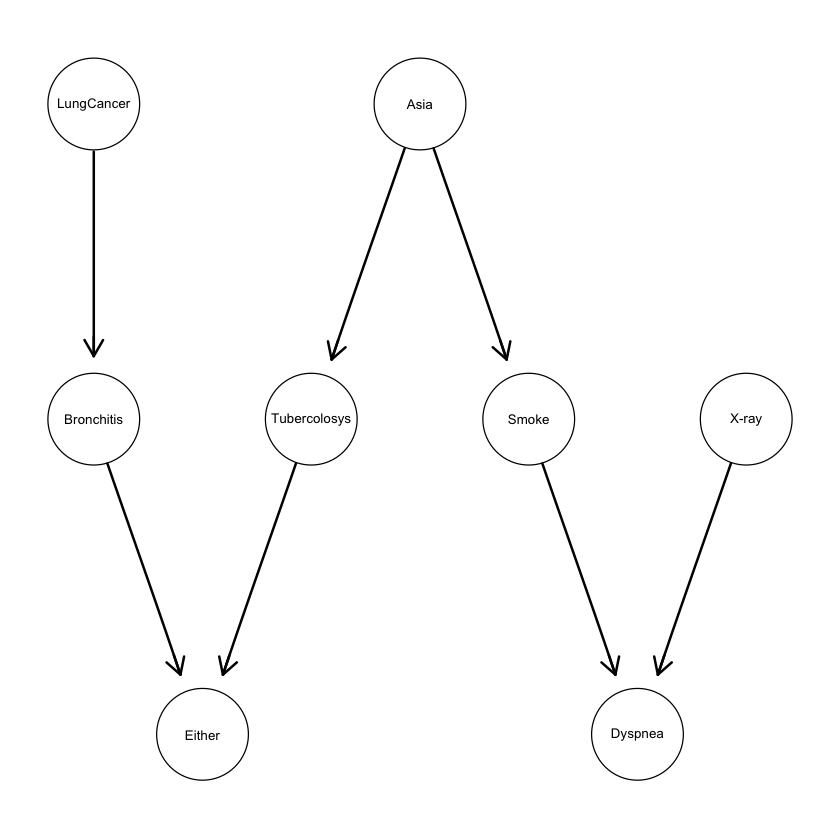

In [5]:
# Adjacency matrix
cat("Asia adjacency matrix:\n\n")
print(structure(
  dag(asia_net_bs),
  dimnames = list(variables(asia_net_bs), variables(asia_net_bs))
))

plot(asia_net_bs, main = "Asia DAG")

In [12]:
# Child Dataset
child_data <- bnstruct::child()
child_data <- bnstruct::impute(child_data, k.impute = 10)
layering_mi_child <- child_order

bnstruct :: performing imputation ...

bnstruct :: imputation finished.



In [13]:
child_net_bs <- learn.network(
  child_data,
  algo = "mmhc",
  scoring.func = "BDeu",
  layering = layering_mi_child,
  max.parents = num.variables(child_data)-1,
  use.imputed.data = TRUE
)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



Child adjacency matrix:

               BirthAsphyxia Disease Age LVH DuctFlow CardiacMixing LungParench
BirthAsphyxia              0       0   0   0        0             0           0
Disease                    1       0   1   1        1             1           0
Age                        0       0   0   0        0             0           0
LVH                        0       0   0   0        0             0           0
DuctFlow                   0       0   0   0        0             0           0
CardiacMixing              0       0   0   0        0             0           0
LungParench                0       1   0   0        0             0           0
LungFlow                   0       0   0   0        0             0           0
Sick                       0       0   1   0        0             0           0
HypDistrib                 0       0   0   0        0             0           0
HypoxiaInO2                0       0   0   0        0             0           0
CO2            

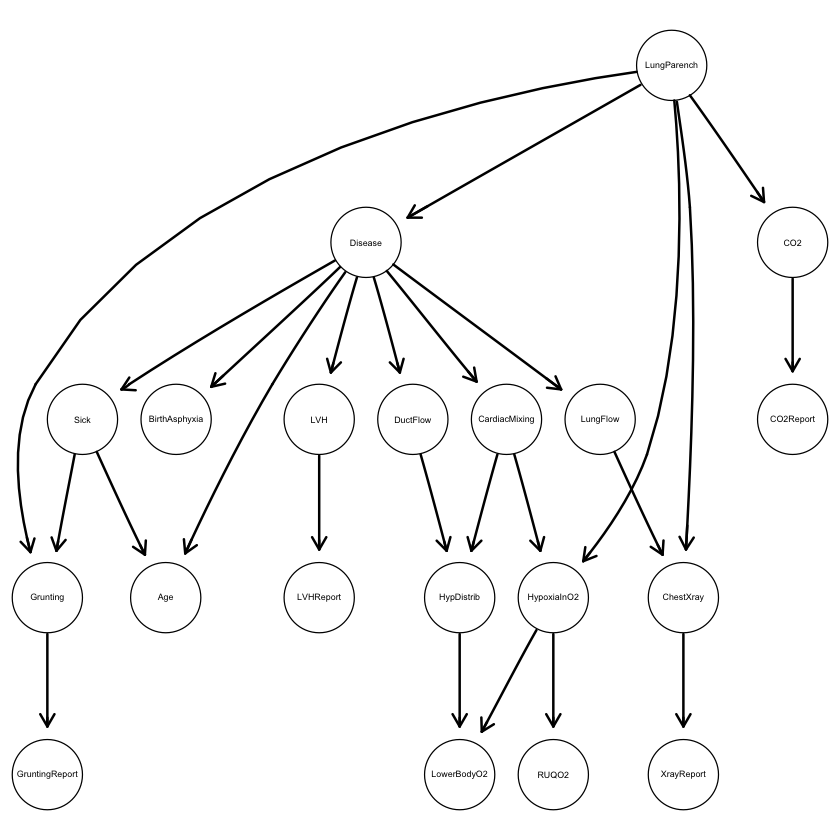

In [14]:
cat("Child adjacency matrix:\n\n")
print(structure(
  dag(child_net_bs),
  dimnames = list(variables(child_net_bs), variables(child_net_bs))
))
plot(child_net_bs, main = "Child DAG")

In [15]:
# Ruiz Dataset
df_ruiz <- data.frame(
  x1 = c(1,1,0,1,0,0,1,0,1,0),
  x2 = c(0,1,0,1,0,1,1,0,1,0),
  x3 = c(0,1,1,1,0,1,1,0,1,0)
)
df_ruiz[] <- df_ruiz + 1

ruiz_data <- BNDataset(
  data = df_ruiz,
  discreteness = c("d","d","d"),
  variables = c("x1","x2","x3"),
  node.sizes = c(2,2,2)
)

# define layering: highest‐score first
layering_mi_ruiz <- node_order

In [16]:
ruiz_net_bs <- learn.network(
  ruiz_data,
  algo = "mmhc",
  scoring.func = "BDeu",
  layering = layering_mi_ruiz,
  max.parents = num.variables(ruiz_data)-1
)

bnstruct :: learning the structure using MMHC ...

bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



Ruiz adjacency matrix:
   x1 x2 x3
x1  0  0  0
x2  1  0  0
x3  0  1  0


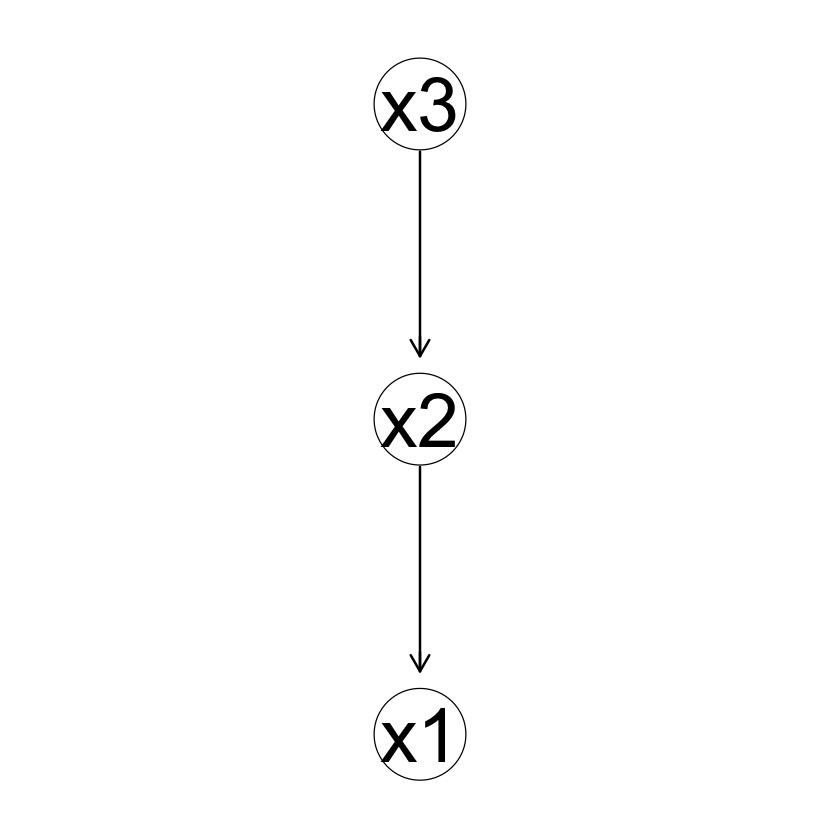

In [18]:
cat("Ruiz adjacency matrix:\n")
print(structure(
  dag(ruiz_net_bs),
  dimnames = list(variables(ruiz_net_bs), variables(ruiz_net_bs))
))
plot(ruiz_net_bs, main = "Ruiz DAG")